In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet(
    "/home/ran/afeka/computer-vision/experiment_baseline_no_rejection/results.parquet"
)
df["label"] = df["label"].astype(int)

In [3]:
df["probability"] = round(df["probability"], 5)

In [4]:
df.dtypes

img_id              object
reject                bool
label                int64
probability        float64
predicted_label      int64
dtype: object

In [5]:
df["margin"] = abs(df["probability"] - 0.5)
df["margin"] = df["margin"].astype(float)

In [6]:
df.head()

,img_id,reject,label,probability,predicted_label,margin
0,img_0,False,1,0.99986,1,0.49986
1,img_1,False,0,0.19939,0,0.30061
2,img_2,False,0,0.00000,0,0.50000
3,img_3,False,1,0.99572,1,0.49572
4,img_4,False,0,0.10408,0,0.39592


In [7]:
correct = df[df["label"] == df["predicted_label"]]
wrong = df[df["label"] != df["predicted_label"]]

In [8]:
def calculate_reject_rate_by_margin(df, margin):
    cond1 = df["margin"] < margin
    return len(df[cond1]) / len(df)

In [9]:
correct_reject = calculate_reject_rate_by_margin(wrong, margin=0.2)
print(f"rejection rate: {correct_reject}")

rejection rate: 0.14415862808145766


In [10]:
wrong_reject = calculate_reject_rate_by_margin(correct, margin=0.2)
print(f"rejection rate: {wrong_reject}")

rejection rate: 0.06621725403191399


In [11]:
total_reject = calculate_reject_rate_by_margin(df, margin=0.2)
print(f"total rejections: {total_reject}")

total rejections: 0.088409423828125


In [12]:
from src.metrics import calculate_metrics

origial_metrics = calculate_metrics(df, label_col="label", pred_col="predicted_label")

In [13]:
df_after_rejection = df[df["margin"] > 0.2]
metrics = calculate_metrics(
    df_after_rejection, label_col="label", pred_col="predicted_label"
)

In [14]:
for key in metrics.keys():
    print(f"after rejection: {key} ---------- {metrics[key]}")
    print(f"original: {key} ------------ {origial_metrics[key]} \n")

after rejection: accuracy ---------- 0.7326838739914968
original: accuracy ------------ 0.71527099609375 

after rejection: precision ---------- 0.8186839810059114
original: precision ------------ 0.8 

after rejection: recall ---------- 0.5801400906468892
original: recall ------------ 0.573731452647005 

after rejection: f1_score ---------- 0.6790723845504602
original: f1_score ------------ 0.668231278002987 

after rejection: confusion_matrix ---------- [[13438, 1871], [6114, 8448]]
original: confusion_matrix ------------ [[14042, 2349], [6981, 9396]] 

after rejection: classification_report ---------- {'0': {'precision': 0.6872954173486089, 'recall': 0.8777843098830753, 'f1-score': 0.770947477123433, 'support': 15309.0}, '1': {'precision': 0.8186839810059114, 'recall': 0.5801400906468892, 'f1-score': 0.6790723845504602, 'support': 14562.0}, 'accuracy': 0.7326838739914968, 'macro avg': {'precision': 0.7529896991772602, 'recall': 0.7289622002649823, 'f1-score': 0.7250099308369466, 'su

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
def plot_confusion_matrix(cm, title="Confusion matrix", cmap=plt.cm.Blues):
    # Create the plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    # Set axis labels and title
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("rejection confusion matrix")
    plt.tight_layout()
    plt.show()

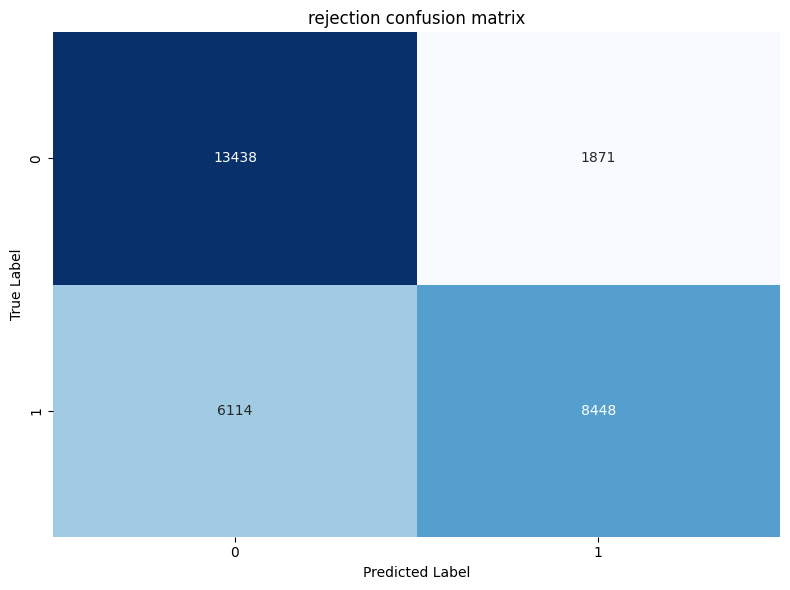

In [18]:
plot_confusion_matrix(metrics["confusion_matrix"])

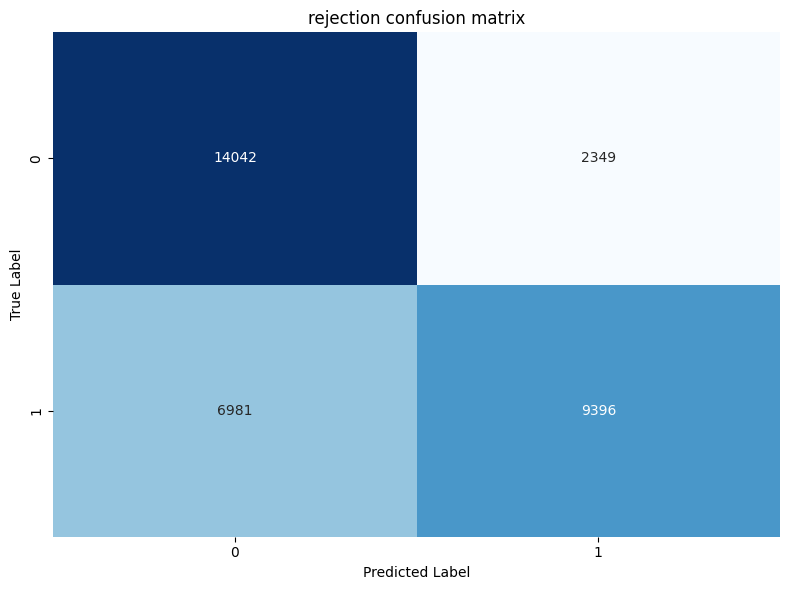

In [19]:
plot_confusion_matrix(origial_metrics["confusion_matrix"])